In [1]:
import h5py
import numpy as np
from qiskit.quantum_info import partial_trace
import matplotlib.pyplot as plt

In [2]:
# create |00><00| operator
v = np.array([1, 0, 0, 0])
op = np.outer(v, v.conj())
op

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [3]:
fidilities = []
ITER_SET = [1, 4, 7, 10]
for i in ITER_SET:
    f = h5py.File(f'grover_{i}.h5','r')
    # load the time points from the h5 file
    tp = np.array(f['QERes/t'])
    # load the density matrices from the h5 file
    rho = np.array(f['QERes/states'])
    # use partial_trace to get the reduced density matrix of the 2nd qubit
    fp=partial_trace(rho[-1,:,:], [0, 2]).expectation_value(op).real
    fidilities.append(fp)
    f.close()

In [4]:
fidilities_free = []
# ITER_SET2 = [1, 4]
for i in ITER_SET:
    f = h5py.File(f'grover_{i}.h5','r')
    # load the time points from the h5 file
    tp = np.array(f['QERes/t'])
    # load the density matrices from the h5 file
    rho = np.array(f['QERes/states'])
    # use partial_trace to get the reduced density matrix of the 2nd qubit
    fp=partial_trace(rho[-1,:,:], [0, 2]).expectation_value(op).real
    fidilities_free.append(fp)
    f.close()

In [5]:
fidilities

[0.8198749480909621,
 0.5874050765540633,
 0.31935327404646985,
 0.36891488137220774]

In [6]:
fidilities_free

[0.8198749480909621,
 0.5874050765540633,
 0.31935327404646985,
 0.36891488137220774]

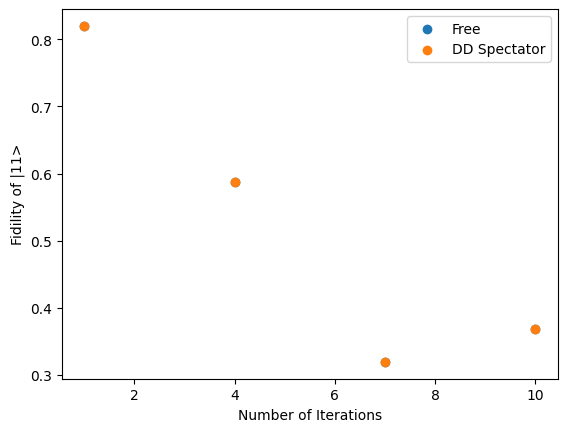

In [7]:
fig, ax = plt.subplots()
ax.scatter(ITER_SET, fidilities_free, label="Free")
ax.scatter(ITER_SET, fidilities, label="DD Spectator")

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fidility of |11>')
ax.legend()
plt.show()